In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


In [2]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


import tensorflow as tf

import random
from random import shuffle

import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.models import model_from_json

In [3]:
train = pd.read_csv("../input/used-cars-price-prediction/train-data.csv")
train.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
test = pd.read_csv("../input/used-cars-price-prediction/test-data.csv")
test.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [5]:
frames = [train,test]
dataset = pd.concat(frames)

In [6]:
dataset

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [7]:
dataset.dropna(axis = 0,how = "any", inplace = True)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 1773 to 732
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         576 non-null    int64  
 1   Name               576 non-null    object 
 2   Location           576 non-null    object 
 3   Year               576 non-null    int64  
 4   Kilometers_Driven  576 non-null    int64  
 5   Fuel_Type          576 non-null    object 
 6   Transmission       576 non-null    object 
 7   Owner_Type         576 non-null    object 
 8   Mileage            576 non-null    object 
 9   Engine             576 non-null    object 
 10  Power              576 non-null    object 
 11  Seats              576 non-null    float64
 12  New_Price          576 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 63.0+ KB


In [10]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [11]:
X_train["Name"].value_counts()

BMW 3 Series 320d                          11
Maruti Alto K10 VXI                        10
Hyundai Grand i10 1.2 Kappa Sportz         10
Maruti Vitara Brezza ZDi Plus Dual Tone     8
Maruti Eeco 7 Seater Standard               8
                                           ..
Ford Freestyle Titanium Petrol              1
Maruti S-Cross Alpha DDiS 200 SH            1
Jaguar XF 2.0 Diesel Portfolio              1
Mercedes-Benz GLA Class 200 d Sport         1
Audi A6 35 TFSI Matrix                      1
Name: Name, Length: 264, dtype: int64

In [12]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [13]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

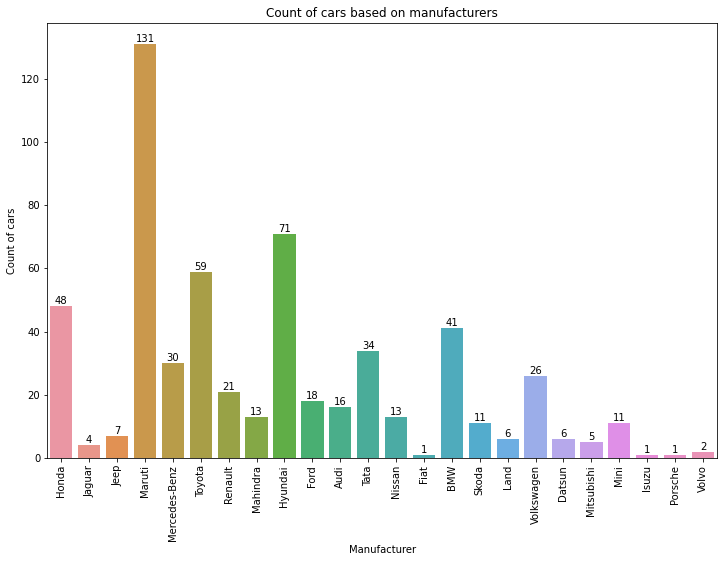

In [14]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [15]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

In [16]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

In [17]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

In [18]:
X_train["Kilometers_Driven"]

1773    15135
1652     4000
3244    15050
2371    29202
962      8682
        ...  
456     12923
750     18955
2008    67000
3127    35981
732     55818
Name: Kilometers_Driven, Length: 576, dtype: int64

In [19]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')


In [20]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


In [21]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [22]:
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [23]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

In [24]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

In [25]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [26]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [27]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [28]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

In [29]:
print(y_train)
X_train_sum = np. sum(X_train)
X_train_has_nan = np. isnan(X_train_sum)
print(X_train_has_nan)

1773     9.29
1652    38.00
3244    17.50
2371     3.90
962     39.50
        ...  
456      8.92
750     10.65
2008    16.50
3127     9.51
732      5.70
Name: Price, Length: 576, dtype: float64
False


In [30]:
Y_TEST = pd.Series.to_numpy(y_test)

In [31]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_linear_pred = linearRegression.predict(X_test)
print(r2_score(y_test, y_linear_pred))

print("Printing the comparision : ")
np.set_printoptions(precision=3)
print(np.concatenate((y_linear_pred.reshape(len(y_linear_pred),1), Y_TEST.reshape(len(Y_TEST),1)),1))

0.8318091414739616
Printing the comparision : 
[[ 1.109e+01  1.150e+01]
 [ 1.455e+00  5.500e+00]
 [ 3.216e+01  2.450e+01]
 [ 1.534e+01  1.275e+01]
 [ 4.359e+00  4.300e+00]
 [ 6.069e+00  5.920e+00]
 [ 2.665e+00  4.000e+00]
 [ 2.609e+01  2.482e+01]
 [ 6.413e+00  3.750e+00]
 [ 2.028e+00  4.500e+00]
 [ 1.584e+00  3.200e+00]
 [ 1.974e+01  1.702e+01]
 [ 2.150e+01  2.391e+01]
 [ 8.206e+00  7.500e+00]
 [ 2.560e+01  2.999e+01]
 [ 1.071e+01  8.390e+00]
 [ 2.690e+01  1.964e+01]
 [-9.746e-01  3.100e+00]
 [ 4.545e+00  3.750e+00]
 [ 1.906e+01  2.169e+01]
 [ 9.594e+00  1.000e+01]
 [ 3.034e+00  3.940e+00]
 [ 4.571e+00  3.500e+00]
 [ 2.254e+00  6.200e+00]
 [ 2.687e+01  3.085e+01]
 [ 1.076e+01  1.199e+01]
 [ 9.815e+00  4.680e+00]
 [ 5.733e+00  7.270e+00]
 [ 1.808e+01  1.395e+01]
 [ 2.175e+01  1.975e+01]
 [ 3.613e+00  7.250e+00]
 [ 3.079e+01  2.200e+01]
 [ 5.059e+00  3.720e+00]
 [ 6.551e+00  5.390e+00]
 [ 2.501e+00  2.900e+00]
 [ 2.855e+00  4.950e+00]
 [ 5.035e+00  6.900e+00]
 [ 2.409e+01  2.550e+01]
 [ 

In [32]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_ref_pred = rf.predict(X_test)
print("accuracy : ", r2_score(y_test, y_ref_pred))

print("Printing the comparision : ")
np.set_printoptions(precision=2)
print(np.concatenate((y_ref_pred.reshape(len(y_ref_pred),1), Y_TEST.reshape(len(Y_TEST),1)),1))

accuracy :  0.8947310434827942
Printing the comparision : 
[[ 10.43  11.5 ]
 [  3.91   5.5 ]
 [ 24.81  24.5 ]
 [ 15.51  12.75]
 [  3.7    4.3 ]
 [  5.58   5.92]
 [  6.87   4.  ]
 [ 24.01  24.82]
 [  4.25   3.75]
 [  3.82   4.5 ]
 [  4.27   3.2 ]
 [ 20.    17.02]
 [ 24.81  23.91]
 [  6.81   7.5 ]
 [ 32.31  29.99]
 [  8.9    8.39]
 [ 20.08  19.64]
 [  4.08   3.1 ]
 [  5.32   3.75]
 [ 19.91  21.69]
 [  9.41  10.  ]
 [  3.58   3.94]
 [  3.74   3.5 ]
 [  4.2    6.2 ]
 [ 31.02  30.85]
 [ 14.4   11.99]
 [  5.31   4.68]
 [  6.76   7.27]
 [ 12.43  13.95]
 [ 19.8   19.75]
 [  6.34   7.25]
 [ 26.08  22.  ]
 [  3.63   3.72]
 [  5.54   5.39]
 [  3.3    2.9 ]
 [  5.2    4.95]
 [  6.08   6.9 ]
 [ 25.72  25.5 ]
 [ 18.96  19.97]
 [ 24.33  17.75]
 [  2.94   2.6 ]
 [ 10.57  10.9 ]
 [ 28.02  23.5 ]
 [  6.27   6.67]
 [  8.6    9.18]
 [  8.9    9.62]
 [ 43.87  45.  ]
 [  3.31   2.1 ]
 [ 57.41  70.99]
 [ 28.37  24.46]
 [  9.61   9.5 ]
 [ 20.08  17.55]
 [  9.06   9.  ]
 [ 29.93  39.84]
 [  8.15   9.25]
 [  5.

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [34]:
reg_test = regressor.predict(X_test)

In [35]:
sum=0
ct=0
per=0
diff=[]
for i in range(len(reg_test)):
    sum=abs(reg_test[i]-Y_TEST[i])
    diff.append(sum)
    if(sum<=1.0):
        ct=ct+1
per=(ct/len(reg_test))
print(per)

0.46153846153846156


In [36]:
df_analysis = pd.DataFrame(list(zip(reg_test,Y_TEST ,diff)), 
               columns =['predicted', 'actual','difference']) 
df_analysis

,predicted,actual,difference
0,11.25,11.50,0.25
1,3.67,5.50,1.83
2,17.85,24.50,6.65
3,21.75,12.75,9.00
4,7.21,4.30,2.91
...,...,...,...
242,8.12,5.90,2.22
243,4.75,5.65,0.90
244,3.25,2.90,0.35
245,6.50,10.49,3.99


In [37]:
r2_score(y_test, reg_test)

0.46578918429810245

In [38]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=24, activation='relu'))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

ann.add(tf.keras.layers.Dense(units=64, activation='relu'))


ann.add(tf.keras.layers.Dense(units=1))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = ann.fit(X_train, y_train, batch_size = 32, epochs = 1500)

Epoch 1/1500
18/18 [==============================] - 1s 2ms/step - loss: 423.3808
Epoch 2/1500
18/18 [==============================] - 0s 1ms/step - loss: 442.5991
Epoch 3/1500
18/18 [==============================] - 0s 1ms/step - loss: 241.5197
Epoch 4/1500
18/18 [==============================] - 0s 1ms/step - loss: 132.9176
Epoch 5/1500
18/18 [==============================] - 0s 1ms/step - loss: 77.1360
Epoch 6/1500
18/18 [==============================] - 0s 1ms/step - loss: 65.1867
Epoch 7/1500
18/18 [==============================] - 0s 1ms/step - loss: 40.6738
Epoch 8/1500
18/18 [==============================] - 0s 1ms/step - loss: 54.4293
Epoch 9/1500
18/18 [==============================] - 0s 1ms/step - loss: 81.6778
Epoch 10/1500
18/18 [==============================] - 0s 1ms/step - loss: 31.3894
Epoch 11/1500
18/18 [==============================] - 0s 1ms/step - loss: 34.8931
Epoch 12/1500
18/18 [==============================] - 0s 1ms/step - loss: 43.5629
Epoch 13/

In [39]:
y_ann_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_ann_pred.reshape(len(y_ann_pred),1), Y_TEST.reshape(len(Y_TEST),1)),1))

[[ 11.19  11.5 ]
 [  4.     5.5 ]
 [ 27.39  24.5 ]
 [ 13.    12.75]
 [  1.98   4.3 ]
 [  5.38   5.92]
 [  5.31   4.  ]
 [ 22.19  24.82]
 [  4.46   3.75]
 [  3.92   4.5 ]
 [  4.21   3.2 ]
 [ 19.19  17.02]
 [ 18.38  23.91]
 [  6.     7.5 ]
 [ 27.28  29.99]
 [  9.39   8.39]
 [ 19.52  19.64]
 [  4.68   3.1 ]
 [  5.1    3.75]
 [ 18.85  21.69]
 [  8.8   10.  ]
 [  3.34   3.94]
 [  5.16   3.5 ]
 [  4.54   6.2 ]
 [ 34.65  30.85]
 [  8.49  11.99]
 [  6.33   4.68]
 [  5.32   7.27]
 [ 14.09  13.95]
 [ 20.37  19.75]
 [  3.49   7.25]
 [  6.35  22.  ]
 [  5.94   3.72]
 [  3.36   5.39]
 [  2.85   2.9 ]
 [  5.73   4.95]
 [  9.98   6.9 ]
 [ 29.95  25.5 ]
 [ 18.91  19.97]
 [ 12.65  17.75]
 [  2.51   2.6 ]
 [ 10.57  10.9 ]
 [ 25.35  23.5 ]
 [  6.58   6.67]
 [  7.84   9.18]
 [  6.16   9.62]
 [ 47.49  45.  ]
 [  2.29   2.1 ]
 [ 89.4   70.99]
 [ 26.34  24.46]
 [  9.39   9.5 ]
 [ 19.16  17.55]
 [  9.32   9.  ]
 [ 52.4   39.84]
 [  8.41   9.25]
 [  6.25   7.56]
 [ 19.6   26.5 ]
 [ 13.04  10.5 ]
 [  3.08   5.1

In [40]:
#r2_score(y_test,y_ann_pred)

In [41]:
df_analysis1 = pd.DataFrame(list(zip(y_ann_pred,Y_TEST ,diff)), 
               columns =['predicted', 'actual','difference']) 

In [42]:
df_analysis1

,predicted,actual,difference
0,[11.187514],11.50,0.25
1,[4.0004783],5.50,1.83
2,[27.391062],24.50,6.65
3,[13.004185],12.75,9.00
4,[1.9760997],4.30,2.91
...,...,...,...
242,[7.105028],5.90,2.22
243,[4.677019],5.65,0.90
244,[4.16562],2.90,0.35
245,[9.158588],10.49,3.99


In [43]:
#test_loss = ann.evaluate(X_test, y_test)

In [44]:
loss = history.history['loss']
loss

[426.07550048828125,
 380.0434875488281,
 263.6745300292969,
 132.1748504638672,
 86.62236022949219,
 64.38091278076172,
 54.12631607055664,
 49.43174362182617,
 45.18627166748047,
 42.251766204833984,
 40.27870178222656,
 38.872528076171875,
 36.67387390136719,
 35.76388168334961,
 34.350887298583984,
 33.564666748046875,
 32.433860778808594,
 31.64299774169922,
 32.39225769042969,
 30.11299705505371,
 29.383113861083984,
 28.18909454345703,
 27.249052047729492,
 26.67572021484375,
 27.820655822753906,
 25.754234313964844,
 24.953794479370117,
 25.01371955871582,
 23.256595611572266,
 23.14521026611328,
 23.540958404541016,
 23.759401321411133,
 21.17681121826172,
 21.619098663330078,
 20.385913848876953,
 19.66692352294922,
 19.2130069732666,
 18.582164764404297,
 19.497426986694336,
 18.391481399536133,
 17.43709373474121,
 18.993793487548828,
 18.044837951660156,
 16.660310745239258,
 16.73832893371582,
 15.099180221557617,
 14.361552238464355,
 13.862773895263672,
 14.104757308959

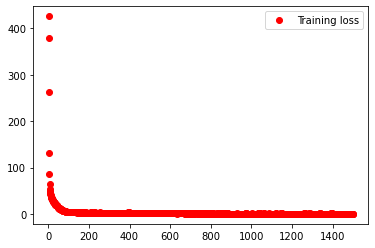

In [45]:
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

In [46]:
# serialize model to JSON
model_json = ann.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [47]:
# serialize weights to HDF5
ann.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [48]:
from keras.models import model_from_yaml
# serialize model to YAML
model_yaml = ann.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)